<a href="https://colab.research.google.com/github/trivedidn/BNFO301_Trivedi_Disha/blob/main/BNFO301_Week2_Disha%20Trivedi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BNFO301 Homework Assignment Week 2**

---



---


This week's assignment is designed to refresh and test your knowledge of the basics of Python. Using the provided FASTA file you will be asked to parse a fasta file into a dictionary. Specific calculations will be made on the sequences and outputed into a secondary file. This project is made to practice inbuilt functions in python in a bioinformatics-focused problem, so **no imports** are necessary for the lab today. Note, specific pseudocode and broken code is provided below to help you with todays project; you may choose to use it (*we highly recommend it*). 

This program requires: <br>
An external dataset (provided within the code)

External Resources:

Dictionaries: https://www.programiz.com/python-programming/nested-dictionary

With Function:https://www.geeksforgeeks.org/with-statement-in-python/

GC-content: https://en.wikipedia.org/wiki/GC-content


<br>
Grading Breakdown: 2.5 points for attendance, 5 points for Part 1, .5 points for part 2-5; 1 point extra credit for part 6 (only to be awarded if part 1 is complete)

---
Meme for the Day:<br>
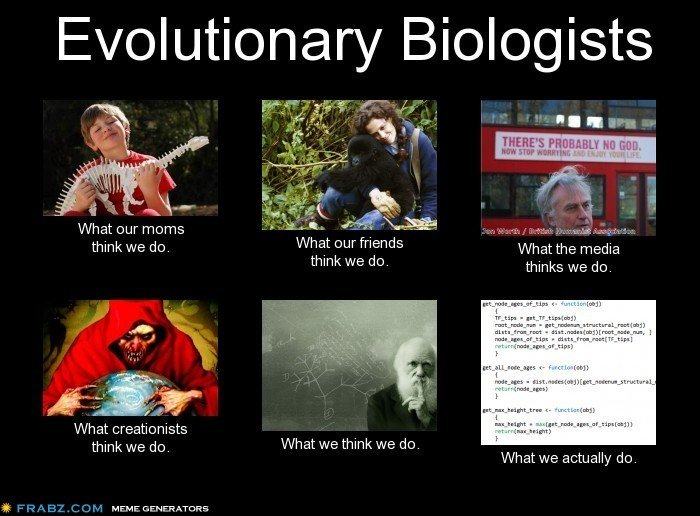


### Part 0- Importing Datafile
This code prompts the used to for a filename and reads the file. Please **do not change the code below.** 
#### Important: Run this block of code before proceeding, hit enter and re-run everytime you rerun your code.
 If this block of code doesn't work automatically, please call a TA or instructor. 

In [6]:
# read user input; if the input is blank then use default file name

DEFAULT_FILE_NAME = 'HW1_SampleData.fasta'

fileName = input("Enter file name: ")
if fileName == "":
  fileName = DEFAULT_FILE_NAME

  #Does the file exists locally, if not get it from the github
  import os.path
  if not os.path.exists(fileName):
    DATA_FILE_GITHUB = "https://raw.githubusercontent.com/MusBansal/BNFO301Data/main/HW1_SampleData.fasta"
    #Load the file from Github to the local folder
    !wget --no-check-certificate --content-disposition $DATA_FILE_GITHUB
  

print("Reading file:", fileName)
#read_file(fileName)  # reads the contents of the file and updates seqList

Enter file name: 
--2022-02-03 19:32:24--  https://raw.githubusercontent.com/MusBansal/BNFO301Data/main/HW1_SampleData.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105228 (103K) [text/plain]
Saving to: ‘HW1_SampleData.fasta’

HW1_SampleData.fast 100%[===================>] 102.76K  --.-KB/s    in 0.01s   

2022-02-03 19:32:25 (7.39 MB/s) - ‘HW1_SampleData.fasta’ saved [105228/105228]

Reading file: HW1_SampleData.fasta


### Part 1- Parse File and Read into Dictionary
 Parse the file into a dictonary that collects the sequence header (key),and A,T,C,G, and total nucleotide count (a list of values) into a dictonary using a loop (don’t forget to clean the white space!)

We have provided the expected output for the dictionary below: <br>
{<br>'HXB2_NesTed_Amplified_ReGion': [3219, 1572, 2146, 1971, 8908], <br> 'KY778388.1 HIV-1 isolATe 2275-EM-1 from USA defeCTive provirus GenomiC sequenCe': [2864, 1378, 1875, 1790, 7907], <br>'KY778389.1 HIV-1 isolATe 2275-EM-10 from USA defeCTive provirus GenomiC sequenCe': [2864, 1378, 1875, 1790, 7907],<br> 'KY778396.1 HIV-1 isolate 2275-EM-22 from USA defective provirus genomic sequence': [3249, 1594, 2161, 1987, 8991],<br> 'KY778397.1 HIV-1 isolate 2275-EM-24 from USA defective provirus genomic sequence': [2864, 1378, 1875, 1790, 7907],<br> 'KY778390.1 HIV-1 isolATe 2275-EM-11 from USA defeCTive provirus GenomiC sequenCe': [3250, 1594, 2160, 1987, 8991],<br> 'KY778398.1 HIV-1 isolate 2275-EM-25 from USA defective provirus genomic sequence': [3249, 1594, 2161, 1987, 8991],<br> 'KY778391.1 HIV-1 isolATe 2275-EM-12 from USA defeCTive provirus GenomiC sequenCe': [2864, 1378, 1875, 1790, 7907],<br> 'KY778392.1 HIV-1 isolATe 2275-EM-14 from USA defeCTive provirus GenomiC sequenCe': [3249, 1594, 2161, 1987, 8991],<br> 'KY778393.1 HIV-1 isolATe 2275-EM-16 from USA defeCTive provirus GenomiC sequenCe': [225, 156, 224, 162, 767],<br> 'KY778399.1 HIV-1 isolate 2275-EM-26 from USA defective provirus genomic sequence': [2864, 1379, 1876, 1788, 7907],<br> 'KY778394.1 HIV-1 isolATe 2275-EM-2 from USA defeCTive provirus GenomiC sequenCe': [3249, 1594, 2161, 1987, 8991],<br> 'KY778395.1 HIV-1 isolATe 2275-EM-21 from USA defeCTive provirus GenomiC sequenCe': [3258, 1595, 2163, 1993, 9009]<br>}<br>
*If you are unable to complete this part of the program, you may use this output to complete the rest of the assignment*




In [7]:

# define a dictionary of sequences, will contain sequence name and the respective counts of nucs
seqDICT = {}
nucs = "ACGT"  # reference string literal that can be used to loop through each nucelotide and add its count to the list 

currSeq = "" # current sequence name

# open my file and starting with the first line, clean my line of white space

with open(fileName) as f: 

# if my line is not a header, strip and make all my nucleotides uppercase
### loop through all the nucleotides and each of the counts into my list of values (try to use the variable: line_variable.count)
### also calculate the sequence length
### keep doing this until I hit the next sequence (another header)

  for lines in f:
    lines = lines.strip() 
    if lines.startswith(">"): 
      currSeq = lines.strip(">")
      seqDICT[currSeq] = [0, 0, 0, 0, 0]
    else:
      lines = lines.strip().upper()
      for i in range (0,4): 
        seqDICT[currSeq][i] += lines.count(nucs[i]) 
      seqDICT[currSeq][4] += len(lines)

print(seqDICT)   


    

                    




{'HXB2_NesTed_Amplified_ReGion': [3219, 1572, 2146, 1971, 8908], 'KY778388.1 HIV-1 isolATe 2275-EM-1 from USA defeCTive provirus GenomiC sequenCe': [2864, 1378, 1875, 1790, 7907], 'KY778389.1 HIV-1 isolATe 2275-EM-10 from USA defeCTive provirus GenomiC sequenCe': [2864, 1378, 1875, 1790, 7907], 'KY778396.1 HIV-1 isolate 2275-EM-22 from USA defective provirus genomic sequence': [3249, 1594, 2161, 1987, 8991], 'KY778397.1 HIV-1 isolate 2275-EM-24 from USA defective provirus genomic sequence': [2864, 1378, 1875, 1790, 7907], 'KY778390.1 HIV-1 isolATe 2275-EM-11 from USA defeCTive provirus GenomiC sequenCe': [3250, 1594, 2160, 1987, 8991], 'KY778398.1 HIV-1 isolate 2275-EM-25 from USA defective provirus genomic sequence': [3249, 1594, 2161, 1987, 8991], 'KY778391.1 HIV-1 isolATe 2275-EM-12 from USA defeCTive provirus GenomiC sequenCe': [2864, 1378, 1875, 1790, 7907], 'KY778392.1 HIV-1 isolATe 2275-EM-14 from USA defeCTive provirus GenomiC sequenCe': [3249, 1594, 2161, 1987, 8991], 'KY77839

### Part 2- Output the length of the sequences from the dictionary. 
Expected Output Example: 'Sequence Name' Length: ###




In [8]:
# Each sequence name and length from sequence dictionary

for key, value in seqDICT.items(): 
  print("Sequence Name:" , key, "Length:", value[4])




Sequence Name: HXB2_NesTed_Amplified_ReGion Length: 8908
Sequence Name: KY778388.1 HIV-1 isolATe 2275-EM-1 from USA defeCTive provirus GenomiC sequenCe Length: 7907
Sequence Name: KY778389.1 HIV-1 isolATe 2275-EM-10 from USA defeCTive provirus GenomiC sequenCe Length: 7907
Sequence Name: KY778396.1 HIV-1 isolate 2275-EM-22 from USA defective provirus genomic sequence Length: 8991
Sequence Name: KY778397.1 HIV-1 isolate 2275-EM-24 from USA defective provirus genomic sequence Length: 7907
Sequence Name: KY778390.1 HIV-1 isolATe 2275-EM-11 from USA defeCTive provirus GenomiC sequenCe Length: 8991
Sequence Name: KY778398.1 HIV-1 isolate 2275-EM-25 from USA defective provirus genomic sequence Length: 8991
Sequence Name: KY778391.1 HIV-1 isolATe 2275-EM-12 from USA defeCTive provirus GenomiC sequenCe Length: 7907
Sequence Name: KY778392.1 HIV-1 isolATe 2275-EM-14 from USA defeCTive provirus GenomiC sequenCe Length: 8991
Sequence Name: KY778393.1 HIV-1 isolATe 2275-EM-16 from USA defeCTive pr

### Part 3-Calculate the total number of each nucleotide present in a sequences and print in the following format:<br>
'Header': Length=[A:###,C:###, G:###, T:###] (order of nucleotides does not matter)

In [9]:
# Each sequence name and length from sequence dictionary
for key, value in seqDICT.items(): 
  print("Header:" , key, "Length=", "[A:", value [0], ",C:", value [1], ",G", value [2], ",T", value [3], "]")

Header: HXB2_NesTed_Amplified_ReGion Length= [A: 3219 ,C: 1572 ,G 2146 ,T 1971 ]
Header: KY778388.1 HIV-1 isolATe 2275-EM-1 from USA defeCTive provirus GenomiC sequenCe Length= [A: 2864 ,C: 1378 ,G 1875 ,T 1790 ]
Header: KY778389.1 HIV-1 isolATe 2275-EM-10 from USA defeCTive provirus GenomiC sequenCe Length= [A: 2864 ,C: 1378 ,G 1875 ,T 1790 ]
Header: KY778396.1 HIV-1 isolate 2275-EM-22 from USA defective provirus genomic sequence Length= [A: 3249 ,C: 1594 ,G 2161 ,T 1987 ]
Header: KY778397.1 HIV-1 isolate 2275-EM-24 from USA defective provirus genomic sequence Length= [A: 2864 ,C: 1378 ,G 1875 ,T 1790 ]
Header: KY778390.1 HIV-1 isolATe 2275-EM-11 from USA defeCTive provirus GenomiC sequenCe Length= [A: 3250 ,C: 1594 ,G 2160 ,T 1987 ]
Header: KY778398.1 HIV-1 isolate 2275-EM-25 from USA defective provirus genomic sequence Length= [A: 3249 ,C: 1594 ,G 2161 ,T 1987 ]
Header: KY778391.1 HIV-1 isolATe 2275-EM-12 from USA defeCTive provirus GenomiC sequenCe Length= [A: 2864 ,C: 1378 ,G 1875

### Part 4- Calculate and print the G/C content of the sequences in the following format:<br>
'Header': GC=[###] 


In [10]:
#making for loop and doing the math for the gc content in the for loop 
for key, value in seqDICT.items(): 
  GC_content = ((value[1] + value[2]) / value[4])
  print("Header:", key, "GC=", GC_content)

Header: HXB2_NesTed_Amplified_ReGion GC= 0.417377638078132
Header: KY778388.1 HIV-1 isolATe 2275-EM-1 from USA defeCTive provirus GenomiC sequenCe GC= 0.4114076135070191
Header: KY778389.1 HIV-1 isolATe 2275-EM-10 from USA defeCTive provirus GenomiC sequenCe GC= 0.4114076135070191
Header: KY778396.1 HIV-1 isolate 2275-EM-22 from USA defective provirus genomic sequence GC= 0.41763986208430653
Header: KY778397.1 HIV-1 isolate 2275-EM-24 from USA defective provirus genomic sequence GC= 0.4114076135070191
Header: KY778390.1 HIV-1 isolATe 2275-EM-11 from USA defeCTive provirus GenomiC sequenCe GC= 0.41752863975086196
Header: KY778398.1 HIV-1 isolate 2275-EM-25 from USA defective provirus genomic sequence GC= 0.41763986208430653
Header: KY778391.1 HIV-1 isolATe 2275-EM-12 from USA defeCTive provirus GenomiC sequenCe GC= 0.4114076135070191
Header: KY778392.1 HIV-1 isolATe 2275-EM-14 from USA defeCTive provirus GenomiC sequenCe GC= 0.41763986208430653
Header: KY778393.1 HIV-1 isolATe 2275-EM-1

### Part 5- Output Table
 Report these results to a new file in a neatly written table and output to a file named HW_Wk2_LastName_Results.txt. Include the count of the number of sequence in the first line of your file as such ("The number of sequences are:###)
 The table should be labeled as such: <br>

 |Length| A count| C Count| G Count| T Count| GC%|
 |-----|-------|-------|-------|-------|-------|
 |###|###|###|###|###|###|###|
  |###|###|###|###|###|###|###|
  |###|###|###|###|###|###|###|


In [11]:
#creating output file

OUTPUT_FILE_NAME = 'HW1_Wk2_Bansal_Results.txt'

outfile = open(OUTPUT_FILE_NAME, "w")
print("Writing to the file:", OUTPUT_FILE_NAME)


#import table 
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Length", "A count", "C count", "G count", "T count", "GC%"]) 
  
# Add rows 
for key, value in seqDICT.items():
  myTable.add_row([value[4], value[0], value[1], value[2], value[3], GC_content])


#Prints values calculated to output file  
print(myTable)











Writing to the file: HW1_Wk2_Bansal_Results.txt
+--------+---------+---------+---------+---------+---------------------+
| Length | A count | C count | G count | T count |         GC%         |
+--------+---------+---------+---------+---------+---------------------+
|  8908  |   3219  |   1572  |   2146  |   1971  | 0.41713841713841715 |
|  7907  |   2864  |   1378  |   1875  |   1790  | 0.41713841713841715 |
|  7907  |   2864  |   1378  |   1875  |   1790  | 0.41713841713841715 |
|  8991  |   3249  |   1594  |   2161  |   1987  | 0.41713841713841715 |
|  7907  |   2864  |   1378  |   1875  |   1790  | 0.41713841713841715 |
|  8991  |   3250  |   1594  |   2160  |   1987  | 0.41713841713841715 |
|  8991  |   3249  |   1594  |   2161  |   1987  | 0.41713841713841715 |
|  7907  |   2864  |   1378  |   1875  |   1790  | 0.41713841713841715 |
|  8991  |   3249  |   1594  |   2161  |   1987  | 0.41713841713841715 |
|  767   |   225   |   156   |   224   |   162   | 0.41713841713841715 |
|  

###Part 6 *Optional* Extra Credit
Report the total number of sequences in the file and a list of the
headers/sequence names to the console.

In [12]:

#set total number to 0 (we will add onto that)
totalHeaders = 0 

#create for loop that goes through all the keys in the dictionary and adds them 
for key, value in seqDICT.items(): 
  totalHeaders += 1 
  print(key) #print each key (header)

#print the total number of headers 
print("Total Amount of Headers:", totalHeaders)

# close the output file
outfile.close()



HXB2_NesTed_Amplified_ReGion
KY778388.1 HIV-1 isolATe 2275-EM-1 from USA defeCTive provirus GenomiC sequenCe
KY778389.1 HIV-1 isolATe 2275-EM-10 from USA defeCTive provirus GenomiC sequenCe
KY778396.1 HIV-1 isolate 2275-EM-22 from USA defective provirus genomic sequence
KY778397.1 HIV-1 isolate 2275-EM-24 from USA defective provirus genomic sequence
KY778390.1 HIV-1 isolATe 2275-EM-11 from USA defeCTive provirus GenomiC sequenCe
KY778398.1 HIV-1 isolate 2275-EM-25 from USA defective provirus genomic sequence
KY778391.1 HIV-1 isolATe 2275-EM-12 from USA defeCTive provirus GenomiC sequenCe
KY778392.1 HIV-1 isolATe 2275-EM-14 from USA defeCTive provirus GenomiC sequenCe
KY778393.1 HIV-1 isolATe 2275-EM-16 from USA defeCTive provirus GenomiC sequenCe
KY778399.1 HIV-1 isolate 2275-EM-26 from USA defective provirus genomic sequence
KY778394.1 HIV-1 isolATe 2275-EM-2 from USA defeCTive provirus GenomiC sequenCe
KY778395.1 HIV-1 isolATe 2275-EM-21 from USA defeCTive provirus GenomiC sequenCe
T